<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/AUSrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages and dataset

In [1]:
####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/weatherAUS.csv'
df = pd.read_csv(path)

In [2]:
sns.set_style("whitegrid")
plt.style.use("seaborn-whitegrid")

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing

### Check Dataset

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Replace null values (or drop)

In [7]:
####
full = df.copy()
# Trying to predict rainfall, so remove na rainfall values
df = df.dropna(axis = 'rows',subset = ['RainTomorrow','Rainfall'])
df = df.fillna(df.mean())
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

### Transform data (datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [9]:
#### 
# Convert to datetime
df['Date'] = pd.to_datetime(df.Date,format = "%Y-%m-%d" )

### Create dummy variable for objects

#### Location

In [ ]:
df.Location.value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Adelaide            3020
Launceston          3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


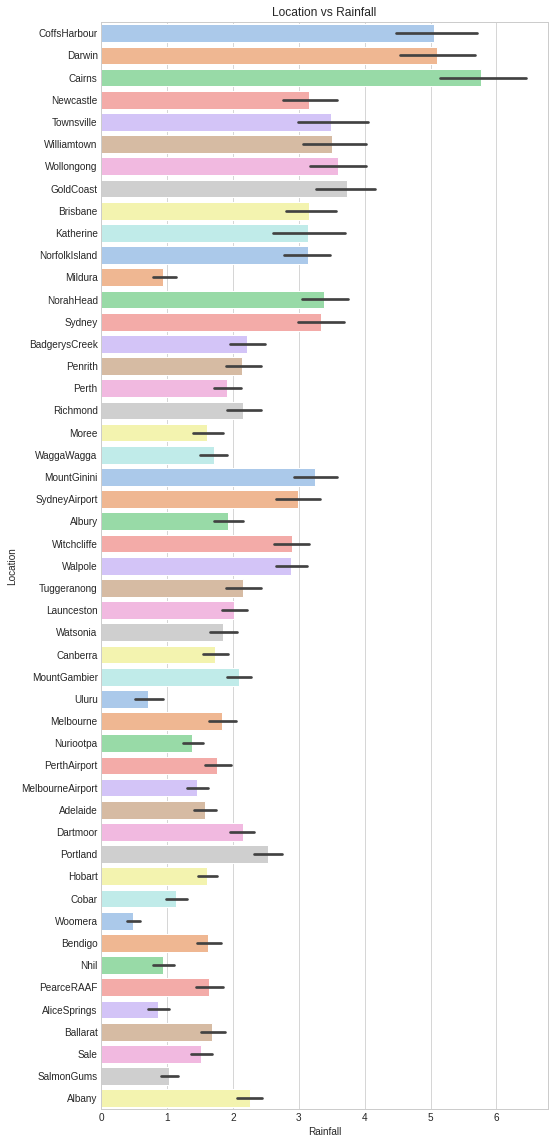

In [10]:
plt.figure(figsize = (8,20))
sns.barplot(y = 'Location',x = 'Rainfall',data = df, palette='pastel', orient = 'h')
plt.title('Location vs Rainfall')
plt.show()

Group location against rainfall, so we could put similar location together.

In [11]:
locationXrain = df.groupby('Location').agg({'Rainfall':['mean']}).reset_index()
locationXrain.columns = ['Location','Rain']
locationXrain = locationXrain.sort_values(by = ['Rain'],ascending = False)
locationXrain['rain_level'] = pd.cut(locationXrain.Rain,5,labels = ['1','2','3','4','5'])

In [12]:
####
df=df.merge(locationXrain[['Location','rain_level']],left_on='Location',right_on='Location')

In [13]:
####
def getDummy(df,col = 'rain_level'):
  tmp = pd.get_dummies(df[col],drop_first=True)
  df2 = pd.concat([df,tmp],axis=1)
  df2 = df2.drop(columns = [col])
  return df2
df = getDummy(df)
df = df.rename(columns = {'2':'region2','3':'region3','4':'region4','5':'region5'})

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,region2,region3,region4,region5
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No,1,0,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No,1,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No,1,0,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No,1,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,1,0,0,0


Drop location column and create a dictionary that stores the location and corresponded regions.

In [15]:
####
def colname(df,key,value):
  cols = df[key]
  vals = df[value]
  dictionary = dict()
  for i, name in enumerate(cols):
    if name in dictionary:
      dictionary[name].append(vals[i])
    else:
      dictionary[name] = vals[i]
  return dictionary
location_to_region = colname(locationXrain,'Location','rain_level')
df = df.drop(columns='Location')

In [ ]:
location_to_region

{'Adelaide': '3',
 'Albany': '2',
 'Albury': '3',
 'AliceSprings': '3',
 'BadgerysCreek': '1',
 'Ballarat': '2',
 'Bendigo': '1',
 'Brisbane': '1',
 'Cairns': '2',
 'Canberra': '2',
 'Cobar': '2',
 'CoffsHarbour': '2',
 'Dartmoor': '2',
 'Darwin': '2',
 'GoldCoast': '1',
 'Hobart': '1',
 'Katherine': '5',
 'Launceston': '1',
 'Melbourne': '2',
 'MelbourneAirport': '2',
 'Mildura': '2',
 'Moree': '3',
 'MountGambier': '3',
 'MountGinini': '2',
 'Newcastle': '5',
 'Nhil': '3',
 'NorahHead': '3',
 'NorfolkIsland': '2',
 'Nuriootpa': '1',
 'PearceRAAF': '2',
 'Penrith': '3',
 'Perth': '3',
 'PerthAirport': '2',
 'Portland': '2',
 'Richmond': '2',
 'Sale': '3',
 'SalmonGums': '3',
 'Sydney': '5',
 'SydneyAirport': '4',
 'Townsville': '2',
 'Tuggeranong': '1',
 'Uluru': '3',
 'WaggaWagga': '2',
 'Walpole': '3',
 'Watsonia': '1',
 'Williamtown': '2',
 'Witchcliffe': '2',
 'Wollongong': '2',
 'Woomera': '1'}

location_to_region to view how locations map to region numbers

#### RainToday RainTomorrow

In [16]:
####
df = df.replace(['No','Yes'],[0,1])

#### WindGustDir WindDir9am WindDir3pm 

In [17]:
####
def getDummy(df,prefixes,col = 'rain_level'):
  tmp = pd.get_dummies(df[col],drop_first=True,prefix=prefixes)
  df2 = pd.concat([df,tmp],axis=1)
  df2 = df2.drop(columns = [col])
  return df2

In [ ]:
#df = getDummy(df,col = 'WindGustDir',colname = ['GustENE','GustESE','GustN','GustNE','GustNNE','GustNNW','GustNW','GustS','GustSE','GustSSE','GustSSW','GustSW','GustW','GustWNW','GustWSW'])
#df = getDummy(df,col = 'WindDir9am',colname = ['9ENE','9ESE','9N','9NE','9NNE','9NNW','9NW','9S','9SE','9SSE','9SSW','9SW','9W','9WNW','9WSW'])
#df = getDummy(df,col = 'WindDir3pm',colname = ['3ENE','3ESE','3N','3NE','3NNE','3NNW','3NW','3S','3E','3SSE','3SSW','3SW','3W','3WNW','3WSW'])

In [18]:
####
df = getDummy(df,col = 'WindGustDir',prefixes = 'Gust')
df = getDummy(df,col = 'WindDir9am',prefixes = '9am')
df = getDummy(df,col = 'WindDir3pm',prefixes = '3pm')

In [19]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,region2,region3,region4,region5,Gust_ENE,Gust_ESE,Gust_N,Gust_NE,Gust_NNE,Gust_NNW,Gust_NW,Gust_S,Gust_SE,Gust_SSE,Gust_SSW,Gust_SW,Gust_W,Gust_WNW,Gust_WSW,9am_ENE,9am_ESE,9am_N,9am_NE,9am_NNE,9am_NNW,9am_NW,9am_S,9am_SE,9am_SSE,9am_SSW,9am_SW,9am_W,9am_WNW,9am_WSW,3pm_ENE,3pm_ESE,3pm_N,3pm_NE,3pm_NNE,3pm_NNW,3pm_NW,3pm_S,3pm_SE,3pm_SSE,3pm_SSW,3pm_SW,3pm_W,3pm_WNW,3pm_WSW
0,2008-12-01,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Convert date to seasons

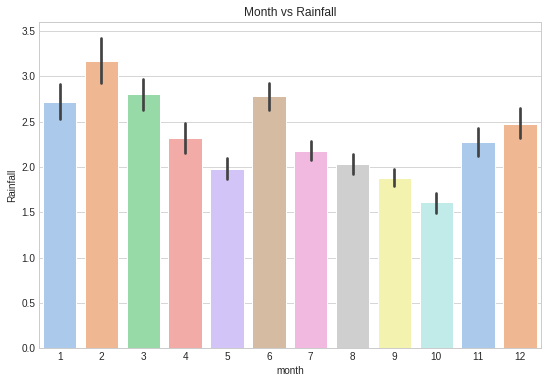

In [23]:
####
df['month'] = df['Date'].dt.month

plt.figure(figsize = (9,6))
sns.barplot(x = 'month',y = 'Rainfall',data = df, palette='pastel')
plt.title('Month vs Rainfall')
plt.show()

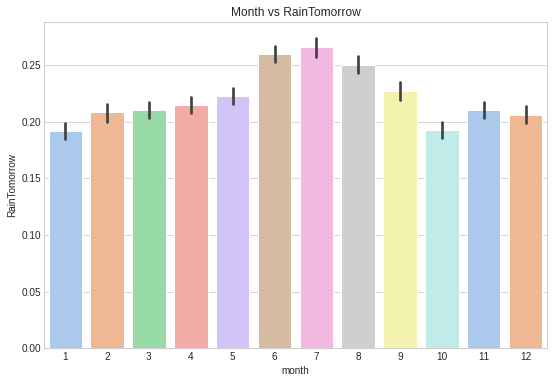

In [25]:
plt.figure(figsize = (9,6))
sns.barplot(x = 'month',y = 'RainTomorrow',data = df, palette='pastel')
plt.title('Month vs RainTomorrow')
plt.show()

In [26]:
####
df = getDummy(df,col = 'month',prefixes = 'month')

### Split data to train and test sets

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Date','RainTomorrow'])
Y = df.RainTomorrow
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30)

### Dimension Reduction / Scale

In [29]:
df.shape

(140787, 79)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainS = sc.fit_transform(X_trainPCA)
X_testS = sc.transform(X_testPCA)

## Exploratory Data Analysis

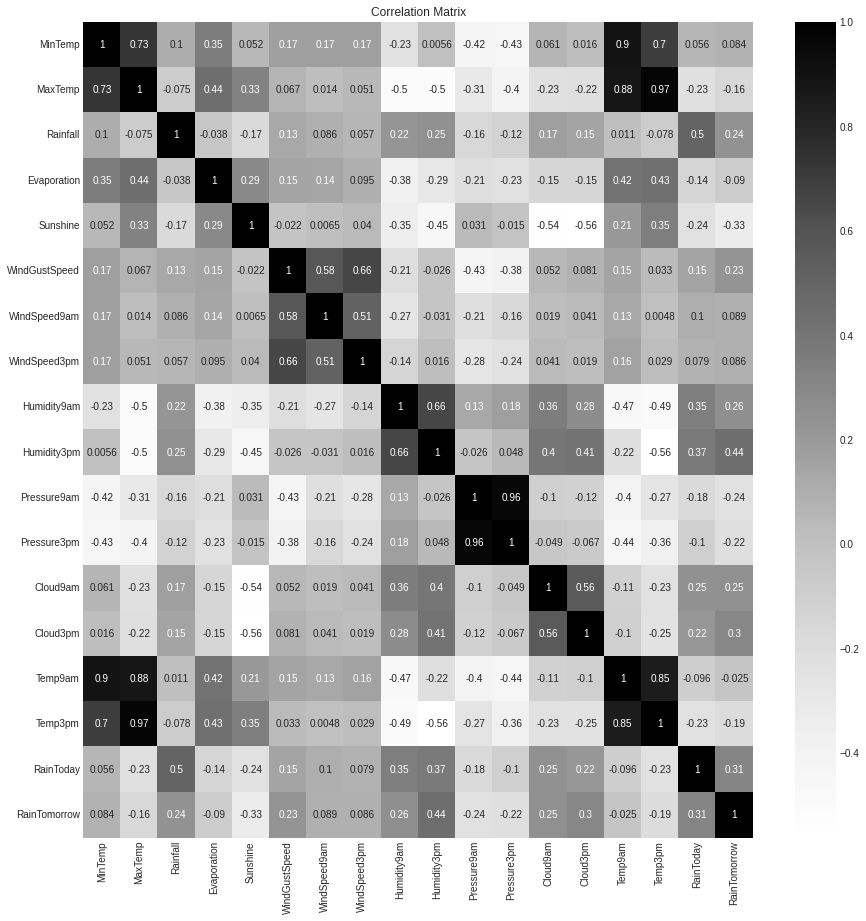

In [34]:
def df_corr(df = df, save = False):
  plt.figure(figsize = (15,15))
  sns.heatmap(df.corr(), cmap = 'Greys',annot= True).set_title('Correlation Matrix')
  if save == True:
    plt.savefig(corr.png)
df_corr(df.iloc[:,0:19])

Text(0.5, 1.0, 'Correlation (RainTomorrow)')

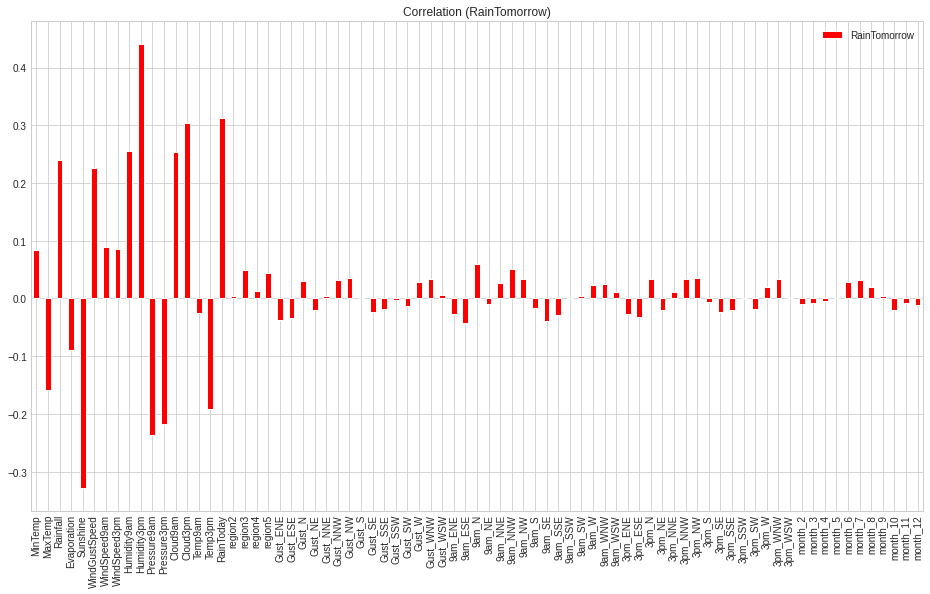

In [35]:
pd.DataFrame(df.corr()['RainTomorrow'].drop('RainTomorrow')).plot(kind = 'bar',color = 'red',figsize = (16,9)).set_title('Correlation (RainTomorrow)')

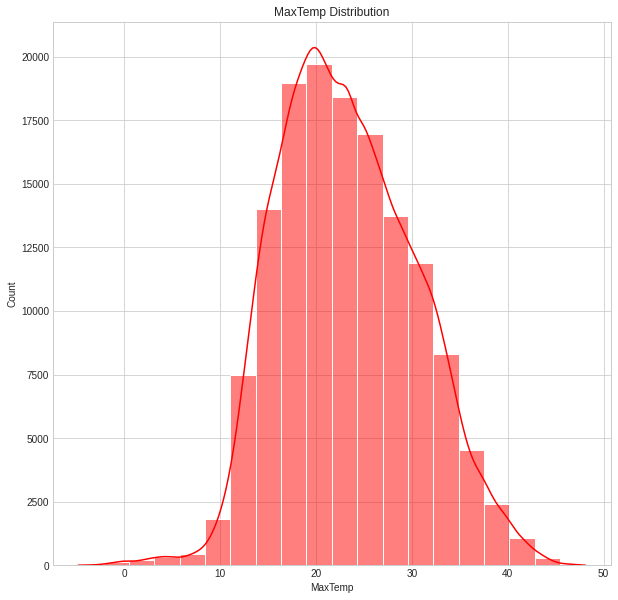

In [36]:
plt.figure(figsize = (10,10))
sns.histplot(df.MaxTemp,kde = True, color = 'red',bins = 20)
plt.xlabel('MaxTemp')
plt.title('MaxTemp Distribution')
plt.show()

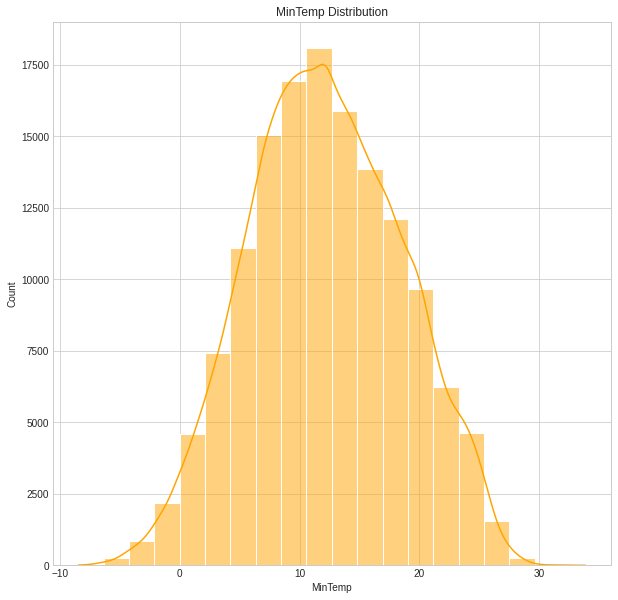

In [37]:
plt.figure(figsize = (10,10))
sns.histplot(df.MinTemp,kde = True, color = 'orange',bins = 20)
plt.xlabel('MinTemp')
plt.title('MinTemp Distribution')
plt.show()

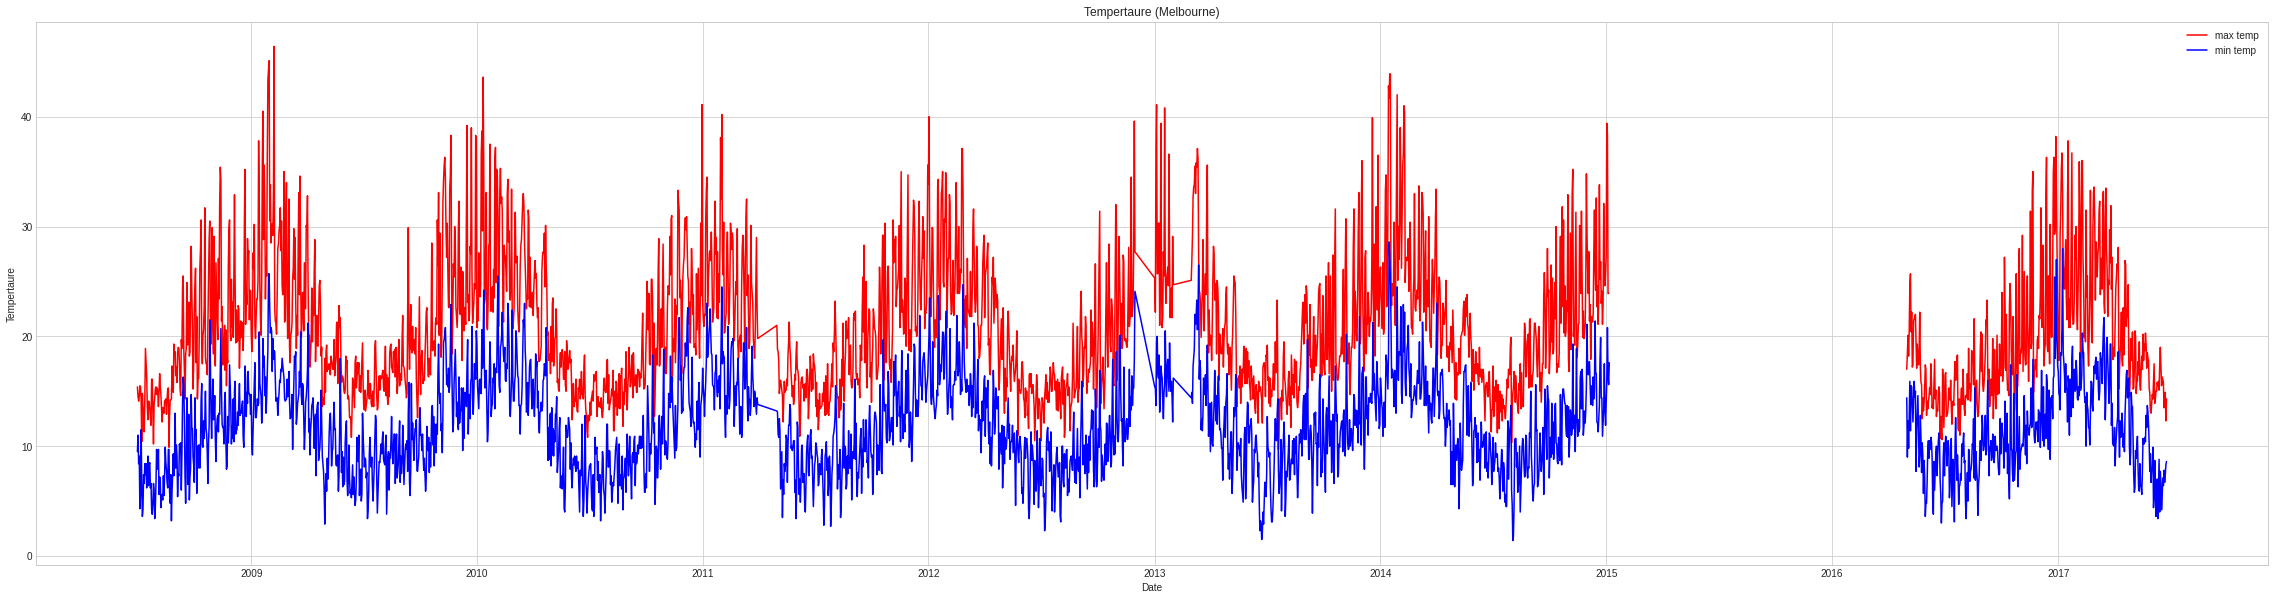

In [38]:
full['Date'] = pd.to_datetime(full.Date,format = "%Y-%m-%d" )
Melbourne = full[full.Location == 'Melbourne']
Melbourne = Melbourne.set_index(Melbourne.Date)
# plot
plt.figure(figsize = (40,10))
plt.plot(Melbourne.index,Melbourne['MaxTemp'],color = 'red', label = "max temp")
plt.plot(Melbourne.index,Melbourne['MinTemp'],color = 'blue', label = 'min temp')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Tempertaure')
plt.title('Tempertaure (Melbourne)')
plt.show()

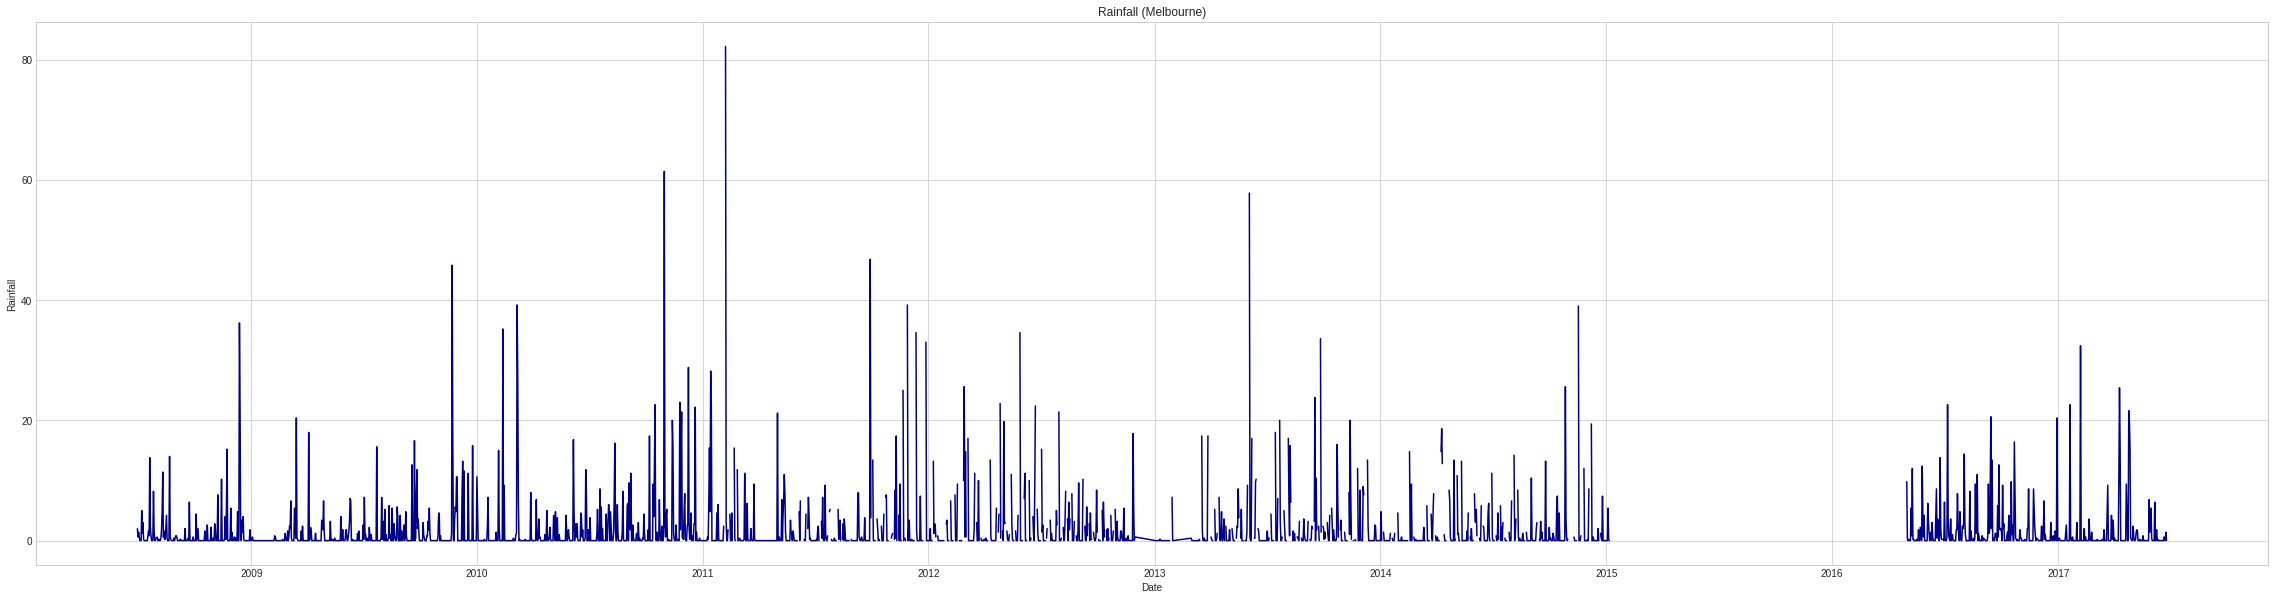

In [39]:
plt.figure(figsize = (40,10))
plt.plot(Melbourne.index,Melbourne['Rainfall'],color = 'darkblue')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall (Melbourne)')
plt.show()

<Figure size 936x720 with 0 Axes>

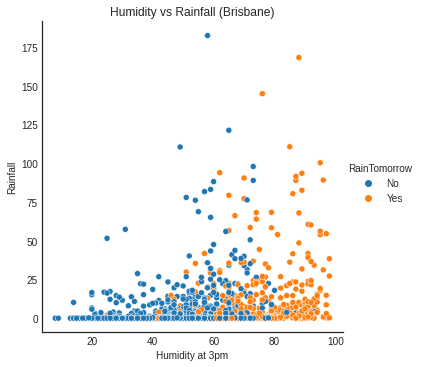

In [40]:
Brisbane = full[full.Location == 'Brisbane']
Brisbane = Brisbane.set_index(Brisbane.Date)

plt.style.use("seaborn-white")
plt.figure(figsize=(13,10))
sns.relplot(x = 'Humidity3pm', y = 'Rainfall', data = Brisbane, hue = 'RainTomorrow')
plt.xlabel('Humidity at 3pm')
plt.ylabel('Rainfall')
plt.title('Humidity vs Rainfall (Brisbane)')
plt.show()

## Machine Learning Model

In [50]:
X_trainS.shape

(98550, 10)

In [42]:
####
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def result_table(Y_test, y_pred ):
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  print(classification_report(Y_test, y_pred))

### Logistic regression

In [62]:
# Create a variable gives information of the columns
names = np.arange(1, 78, 1).tolist()
def colname(df, names = names):
  cols = df.columns
  dictionary = dict()
  clist = ['constant']
  for i, name in enumerate(names):
    dictionary[name] = cols[i]
    clist.append(cols[i])
  return dictionary, clist
col_namnes, clist = colname(df.drop(columns = ['Date','RainTomorrow']))

In [63]:
len(clist)

78

In [65]:
x = sm.add_constant(np.array(X_train))
y = np.array(Y_train)
result = sm.GLM(y, x, data = df,family = sm.families.Binomial()).fit()
result.summary(xname = clist)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                98550
Model:                            GLM   Df Residuals:                    98472
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34793.
Date:                Thu, 09 Dec 2021   Deviance:                       69587.
Time:                        09:12:28   Pearson chi2:                 9.34e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
constant         49.9624      1.912     26.135      0.000      46.216      53.709
MinTemp           0.0114      0.005      2.329      0.020       0.002       0.021
MaxTemp          -0.0494      0.006     -8.163      0.000      -0.061      -0.038
Rainfall          0.0095      0.001      7.376      0.000       0.007       0.012
Evaporation       0.0153      0.004      4.014      0.000       0.008       0.023
Sunshine         -0.1127      0.005    -24.559      0.000      -0.122      -0.104
WindGustSpeed     0.0506      0.001     46.237      0.000       0.048       0.053
WindSpeed9am     -0.0102      0.001     -6.803      0.000      -0.013      -0.007
WindSpeed3pm     -0.0206      0.001    -13.832      0.000      -0.024      -0.018
Humidity9am       0.0048      0.001      4.706      0.000       0.003       0.007
Humidity3pm       0.0580      0.001     55.311      0.000       0.056       0.060
Pressure9am       0.1151      0.006     18.121      0.000       0.103       0.128
Pressure3pm      -0.1720      0.006    -27.098      0.000      -0.184      -0.160
Cloud9am         -0.0006      0.006     -0.102      0.919      -0.012       0.011
Cloud3pm          0.1186      0.006     18.627      0.000       0.106       0.131
Temp9am           0.0442      0.007      6.277      0.000       0.030       0.058
Temp3pm           0.0398      0.006      6.408      0.000       0.028       0.052
RainToday         0.5310      0.026     20.438      0.000       0.480       0.582
region2           0.1691      0.031      5.453      0.000       0.108       0.230
region3          -0.1990      0.035     -5.651      0.000      -0.268      -0.130
region4          -0.2826      0.071     -4.007      0.000      -0.421      -0.144
region5          -0.3529      0.052     -6.801      0.000      -0.455      -0.251
Gust_ENE         -0.0799      0.055     -1.441      0.150      -0.189       0.029
Gust_ESE         -0.0045      0.056     -0.080      0.936      -0.115       0.106
Gust_N           -0.0785      0.054     -1.466      0.143      -0.183       0.026
Gust_NE          -0.1672      0.058     -2.906      0.004      -0.280      -0.054
Gust_NNE         -0.1677      0.058     -2.876      0.004      -0.282      -0.053
Gust_NNW         -0.0439      0.057     -0.776      0.438      -0.155       0.067
Gust_NW          -0.0300      0.054     -0.558      0.577      -0.135       0.075
Gust_S            0.0572      0.052      1.092      0.275      -0.045       0.160
Gust_SE           0.1466      0.052      2.812      0.005       0.044       0.249
Gust_SSE          0.1808      0.053      3.396      0.001       0.076       0.285
Gust_SSW          0.0352      0.053      0.668      0.504      -0.068       0.139
Gust_SW           0.0816      0.053      1.530      0.126      -0.023       0.186
Gust_W           -0.0171      0.051     -0.334   

In [67]:
def logistic(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,Y_train)
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = logistic(X_trainS, X_testS, Y_train, Y_test).ravel()

In [68]:
result_table(Y_test, y_pred)

[[31125  1705]
 [ 4910  4497]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32830
           1       0.73      0.48      0.58      9407

    accuracy                           0.84     42237
   macro avg       0.79      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237



### Decision Tree

In [69]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainS,X_testS,Y_train,Y_test).ravel()

In [70]:
result_table(Y_test, y_pred)

[[28130  4700]
 [ 4575  4832]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     32830
           1       0.51      0.51      0.51      9407

    accuracy                           0.78     42237
   macro avg       0.68      0.69      0.68     42237
weighted avg       0.78      0.78      0.78     42237



In [71]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes = 5)
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[32025   805]
 [ 6919  2488]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     32830
           1       0.76      0.26      0.39      9407

    accuracy                           0.82     42237
   macro avg       0.79      0.62      0.64     42237
weighted avg       0.81      0.82      0.78     42237



### Random sample

Data is too large and takes to long to run ML models, so we randomly sample from the original data.

In [73]:
# random sampling
def random_N(n = 1000,maxRange = 10000):
  from random import uniform
  listNum = []
  i = 1
  while i < n:
    x = round(uniform(0,maxRange))
    if x not in listNum:
      listNum.append(x)
      i = i+1
  return listNum

In [74]:
def sample_data(X_trainS = X_trainS,Y_train = Y_train, n = 3000):
  i = random_N(n = n, maxRange=len(X_trainS)-2)
  X_trainSRand = X_trainS[i,:]
  Y_trainRand = Y_train.values[i]
  return (X_trainSRand,Y_trainRand)

### SVM

In [75]:
(X_trainSRand,Y_trainRand) = sample_data()

In [76]:
def svm(X_train, X_test, Y_train, Y_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear')
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = svm(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[31553  1277]
 [ 5422  3985]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     32830
           1       0.76      0.42      0.54      9407

    accuracy                           0.84     42237
   macro avg       0.81      0.69      0.72     42237
weighted avg       0.83      0.84      0.82     42237



In [77]:
# Take another sample of dataset and see if the results differ
(X_trainSRand,Y_trainRand) = sample_data()
y_pred = svm(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[31326  1504]
 [ 5074  4333]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32830
           1       0.74      0.46      0.57      9407

    accuracy                           0.84     42237
   macro avg       0.80      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237



### KNN

In [78]:
(X_trainSRand,Y_trainRand) = sample_data()
def knn(X_train, X_test, Y_train, Y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = round(np.sqrt(3000)),metric = 'minkowski', p = 2) # Standard Euclidean
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = knn(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[32398   432]
 [ 7235  2172]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.89     32830
           1       0.83      0.23      0.36      9407

    accuracy                           0.82     42237
   macro avg       0.83      0.61      0.63     42237
weighted avg       0.82      0.82      0.78     42237



In [79]:
(X_trainSRand,Y_trainRand) = sample_data(n = 5000)
def knn(X_train, X_test, Y_train, Y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = round(np.sqrt(3000)),metric = 'minkowski', p = 2) # Standard Euclidean
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = knn(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[32361   469]
 [ 7021  2386]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     32830
           1       0.84      0.25      0.39      9407

    accuracy                           0.82     42237
   macro avg       0.83      0.62      0.64     42237
weighted avg       0.82      0.82      0.78     42237



### Naive bayes

In [81]:
def naive(X_train, X_test, Y_train, Y_test):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = naive(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[31095  1735]
 [ 5911  3496]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     32830
           1       0.67      0.37      0.48      9407

    accuracy                           0.82     42237
   macro avg       0.75      0.66      0.68     42237
weighted avg       0.80      0.82      0.80     42237



### Random Forest

In [82]:
def forest(X_train, X_test, Y_train, Y_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = forest(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[31215  1615]
 [ 4735  4672]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     32830
           1       0.74      0.50      0.60      9407

    accuracy                           0.85     42237
   macro avg       0.81      0.72      0.75     42237
weighted avg       0.84      0.85      0.84     42237



### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(77,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(33,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 5)
model.fit(x = X_trainS, y = Y_train, epochs = 100, validation_data=(X_testS,Y_test), callbacks = [earstop])

Epoch 1/100
3080/3080 [==============================] - 8s 2ms/step - loss: 0.5902 - val_loss: 0.4222
Epoch 2/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4524 - val_loss: 0.3993
Epoch 3/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4445 - val_loss: 0.3897
Epoch 4/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4387 - val_loss: 0.4159
Epoch 5/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4389 - val_loss: 0.3935
Epoch 6/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4355 - val_loss: 0.4006
Epoch 7/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4353 - val_loss: 0.3922
Epoch 8/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4365 - val_loss: 0.3934
Epoch 00008: early stopping


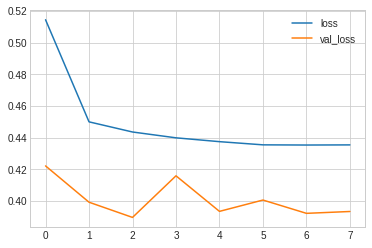

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
y_pred = model.predict_classes(X_testS)
result_table(Y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[32760   106]
 [ 7844  1527]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     32866
           1       0.94      0.16      0.28      9371

    accuracy                           0.81     42237
   macro avg       0.87      0.58      0.58     42237
weighted avg       0.84      0.81      0.76     42237

